In [3]:
from pandas import *
from sklearn import *
from matplotlib.pyplot import *
from seaborn import *
from numpy import *
from matplotlib.figure import Figure
italy=read_csv('italy.csv')
italy.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2,2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


In [21]:
italy=italy.sample(n=100,replace=False)
italy.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
482,482,2020-03-17 17:00:00,ITA,5,Veneto,45.434905,12.338452,548,171,719,1769,2488,214,136,80,2704,35478
59,59,2020-02-26 18:00:00,ITA,4,P.A. Trento,46.068935,11.121231,0,0,0,0,0,0,0,0,0,3
439,439,2020-03-15 17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,10,3,13,43,56,15,0,1,57,230
179,179,2020-03-03 18:00:00,ITA,14,Molise,41.557748,14.659161,3,0,3,0,3,3,0,0,3,13
9,9,2020-02-24 18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,1463


Text(0.5,0.98,'covid 19 aspects correlation')

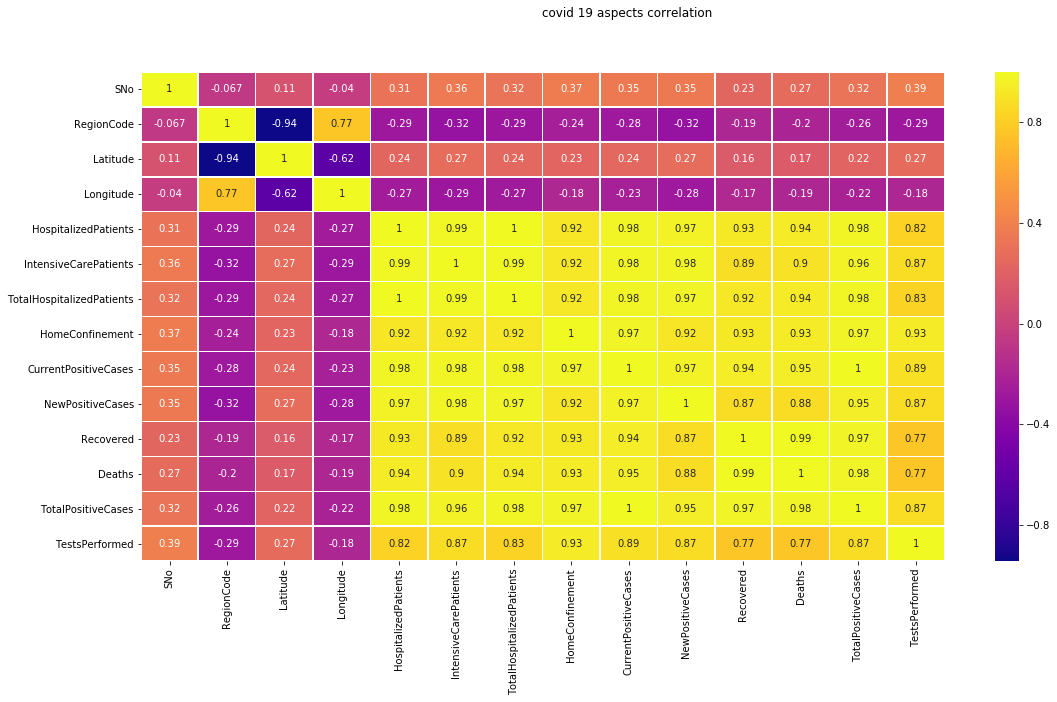

In [21]:
fig,(ax)=subplots(1,1,figsize=(18,9))
corre=italy.corr()
heatmap(corre,cmap='plasma',annot=True,linewidth=0.5)
fig.suptitle('covid 19 aspects correlation')

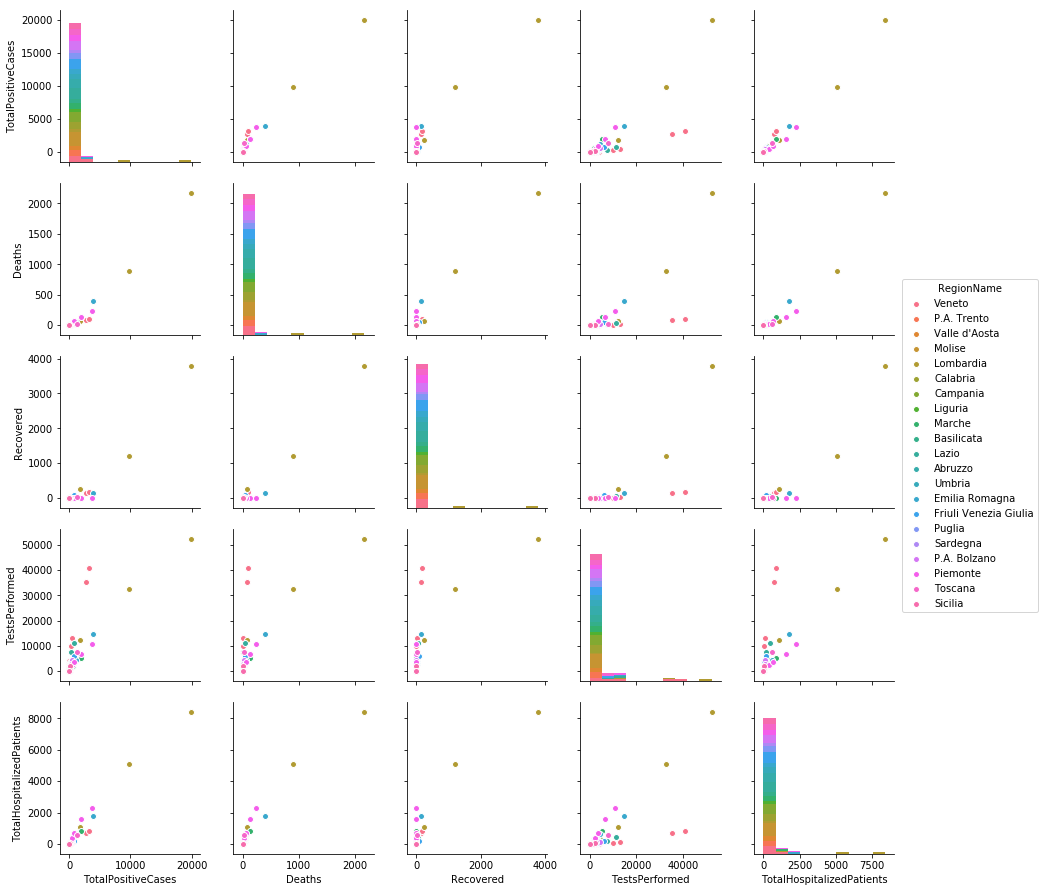

In [25]:
ita=["RegionName","TotalPositiveCases","Deaths","Recovered","TestsPerformed","TotalHospitalizedPatients"]
pairplot(data=italy[ita],hue="RegionName")

In [5]:
token='pk.eyJ1IjoidG9ueWtvc2giLCJhIjoiY2s4cjBkM2JxMDVmZjNscDZkcHNjZWhzeCJ9.2PGsYPeXkJv09a8Vih-qgw'
from plotly.offline import init_notebook_mode,iplot
import plotly
import plotly.express as ex
maps=ex.scatter_mapbox(italy,lat='Latitude',lon='Longitude',hover_name='RegionName',hover_data=['RegionName','TotalPositiveCases'],color_discrete_sequence=['red'],zoom=5,height=400)
maps.update_layout(mapbox_style='dark',mapbox_accesstoken=token)
maps.show()

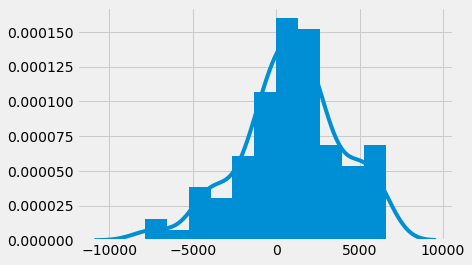

In [43]:
from numpy import *
import math
from scipy.stats import norm,kurtosis,skew
x=italy.TotalPositiveCases
from matplotlib.pyplot import *
from seaborn import *
n=len(x)
p=0
mu=mean(italy.TotalPositiveCases)
sigma=std(italy.TotalPositiveCases)
prob=norm.rvs(size=n,loc=mu,scale=sigma)
distplot(prob,kde=True,hist_kws={'linewidth':15,'alpha':1})  
    

50.81709856075118


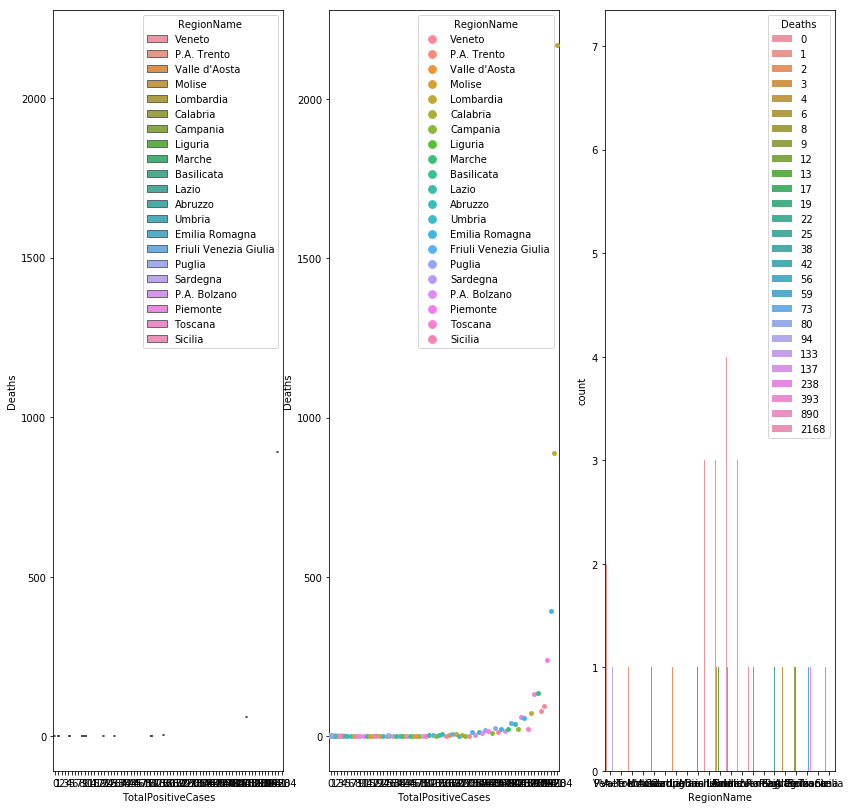

In [30]:
from scipy.stats import *
from seaborn import *
kur=kurtosis(italy.TotalPositiveCases)
print(kur)
fig,ax=subplots(1,3,figsize=(14,14))
boxplot(x=italy.TotalPositiveCases,y=italy.Deaths,hue=italy.RegionName,ax=ax[0])
swarmplot(x=italy.TotalPositiveCases,y=italy.Deaths,hue=italy.RegionName,ax=ax[1])
countplot(x=italy.RegionName,hue=italy.Deaths)

In [21]:
from statsmodels.api import *
from sklearn.model_selection import train_test_split as t
ita=italy.drop(italy.columns[[0,1,2,3,4,5,6]],axis='columns')
ita.head()

,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
171,0,0,0,1,1,0,0,0,1,39
305,4,2,6,8,14,0,0,0,14,212
546,185,44,229,265,494,72,13,22,529,3035
245,2,0,2,3,5,3,0,0,5,99
473,7,5,12,7,19,4,5,1,25,301


In [22]:
x=ita.iloc[:,[0,1,2,3,4,5,6,7,9]]
x.head()

,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TestsPerformed
171,0,0,0,1,1,0,0,0,39
305,4,2,6,8,14,0,0,0,212
546,185,44,229,265,494,72,13,22,3035
245,2,0,2,3,5,3,0,0,99
473,7,5,12,7,19,4,5,1,301


In [23]:
y=ita.iloc[:,8]
y.head()

171      1
305     14
546    529
245      5
473     25
Name: TotalPositiveCases, dtype: int64

In [39]:
x_train,x_test,y_train,y_test=t(x,y,test_size=0.3)
from sklearn.linear_model import LinearRegression as l
from matplotlib.pyplot import *
from sklearn.metrics import *
from numpy import *
model=l()
model.fit(x_train,y_train)
pred=model.predict(x_test)
pred


array([1.10000000e+01, 1.17000000e+02, 2.00000000e+00, 4.20000000e+01,
       1.00800000e+03, 1.00000000e+00, 3.30000000e+01, 1.98100000e+03,
       7.70000000e+01, 9.00000000e+00, 5.29000000e+02, 4.00000000e+00,
       1.52000000e+03, 1.65000000e+02, 3.91227787e-13, 3.50000000e+02,
       1.88000000e+02, 1.30000000e+01, 8.00000000e+00, 4.54411269e-13,
       4.43992716e-13, 4.52058692e-13, 1.25000000e+02, 4.55000000e+02,
       1.38600000e+03, 2.82000000e+02, 2.00000000e+00, 4.50000000e+01,
       4.54747351e-13, 1.13300000e+03])

In [33]:
m_s_e=square(subtract(y_test,pred)).mean()
m_s_e

9.466180960739758e-25

In [37]:
mod=OLS(y_train,x_train).fit()
mod.predict(x_test)
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:     TotalPositiveCases   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.265e+28
Date:                Fri, 10 Apr 2020   Prob (F-statistic):                        0.00
Time:                        12:54:25   Log-Likelihood:                          1602.6
No. Observations:                  70   AIC:                                     -3191.
Df Residuals:                      63   BIC:                                     -3175.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------